In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/MyDrive/KhawarizmiGPT/Project Time Series'

[Errno 2] No such file or directory: 'drive/MyDrive/KhawarizmiGPT/Project Time Series'
/content


In [ ]:
ls

drive/  sample_data/  store5.csv


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Data

In [ ]:
df = pd.read_csv('store5.csv')

In [ ]:
df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


# EDA

## Define Target Variable

In [ ]:
# Melihat nilai unik dari kolom 'family'
unique_families = df['family'].unique()
print("Nilai unik pada kolom 'family':")
print(unique_families)


Nilai unik pada kolom 'family':
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


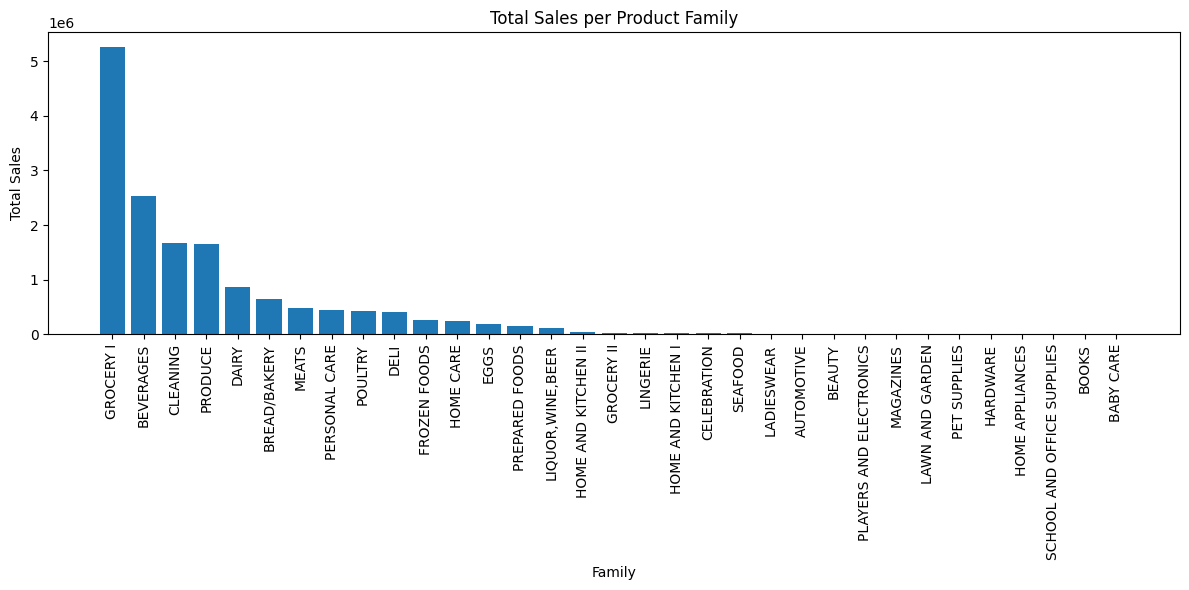

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misal df sudah didefinisikan sebelumnya, jika belum: load dulu dari file CSV misalnya
# df = pd.read_csv('nama_file.csv')

# Grouping dan menjumlahkan sales per family
sales_per_family = df.groupby('family', as_index=False)['sales'].sum()

# Urutkan dari yang terbesar
sales_per_family = sales_per_family.sort_values(by='sales', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(sales_per_family['family'], sales_per_family['sales'])
plt.xticks(rotation=90)
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Family')
plt.tight_layout()
plt.show()


In [ ]:
# Ambil hanya data kategori SEAFOOD
df= df[df['family'] == 'GROCERY I']
df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
12,1464,2013-01-01,5,GROCERY I,0.0,0,NaN
45,3246,2013-01-02,5,GROCERY I,4558.0,0,93.14
78,5028,2013-01-03,5,GROCERY I,3260.0,0,92.97
111,6810,2013-01-04,5,GROCERY I,3085.0,0,93.12
144,8592,2013-01-05,5,GROCERY I,3398.0,0,NaN
...,...,...,...,...,...,...,...
55419,2993442,2017-08-11,5,GROCERY I,2864.0,35,48.81
55452,2995224,2017-08-12,5,GROCERY I,2476.0,31,NaN
55485,2997006,2017-08-13,5,GROCERY I,3141.0,31,NaN
55518,2998788,2017-08-14,5,GROCERY I,2717.0,32,47.59


In [ ]:
# prompt: buatkan agregat monlty dari date, sum salesnya, gunakan group by

df['date'] = pd.to_datetime(df['date'])
df = df.groupby(pd.Grouper(key='date', freq='MS'))[['sales', 'onpromotion', 'dcoilwtico']].sum().reset_index()
df

<ipython-input-11-78b3d7d71693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,sales,onpromotion,dcoilwtico
0,2013-01-01,87331.000,0,1989.89
1,2013-02-01,81325.000,0,1810.87
2,2013-03-01,90429.000,0,1858.77
3,2013-04-01,84438.000,0,2024.47
4,2013-05-01,92975.000,0,2079.21
5,2013-06-01,92232.000,0,1915.45
6,2013-07-01,95687.000,0,2302.76
7,2013-08-01,99879.000,0,2344.60
8,2013-09-01,90385.000,0,2125.79
9,2013-10-01,88947.000,0,2312.38


## Explore Each Variables

In [ ]:
# Ubah kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         56 non-null     datetime64[ns]
 1   sales        56 non-null     float64       
 2   onpromotion  56 non-null     int64         
 3   dcoilwtico   56 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.9 KB


In [ ]:
# Ubah kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'])

# Set kolom date sebagai index
df.set_index('date', inplace=True)

In [ ]:
# Tambahkan kolom waktu turunan
df['year'] = df.index.year
df['month'] = df.index.month
# Cek hasil
df


,sales,onpromotion,dcoilwtico,year,month
date,,,,,
2013-01-01,87331.000,0,1989.89,2013,1
2013-02-01,81325.000,0,1810.87,2013,2
2013-03-01,90429.000,0,1858.77,2013,3
2013-04-01,84438.000,0,2024.47,2013,4
2013-05-01,92975.000,0,2079.21,2013,5
2013-06-01,92232.000,0,1915.45,2013,6
2013-07-01,95687.000,0,2302.76,2013,7
2013-08-01,99879.000,0,2344.60,2013,8
2013-09-01,90385.000,0,2125.79,2013,9


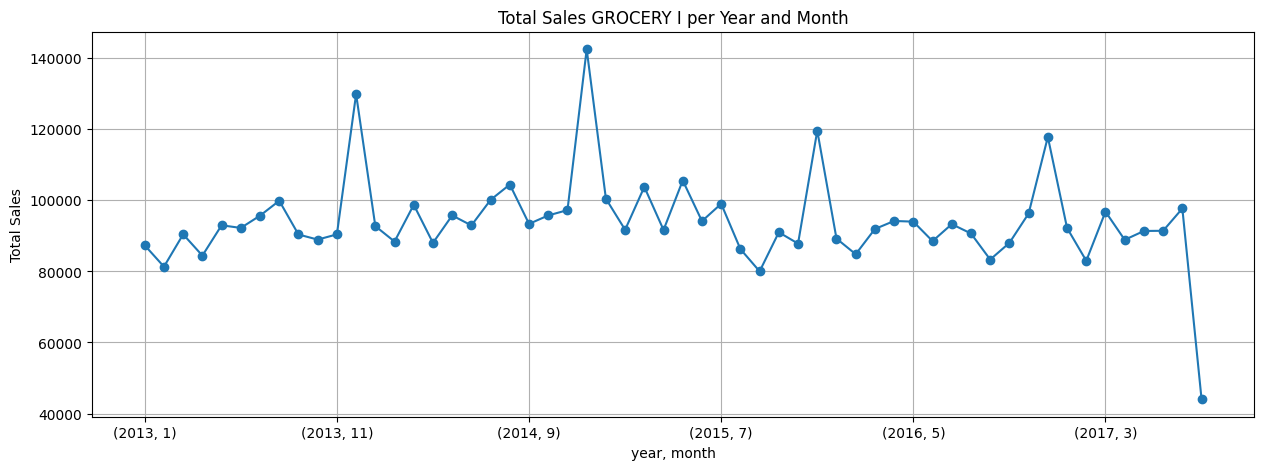

In [ ]:
import matplotlib.pyplot as plt

# Pastikan kolom waktu sudah ada
df['year'] = df.index.year
df['month'] = df.index.month

# Grup berdasarkan (tahun, bulan)
sales_year_month = df.groupby(['year', 'month'])['sales'].sum()

# Plot
plt.figure(figsize=(15, 5))
sales_year_month.plot(marker='o')
plt.title('Total Sales GROCERY I per Year and Month')
plt.xlabel('year, month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


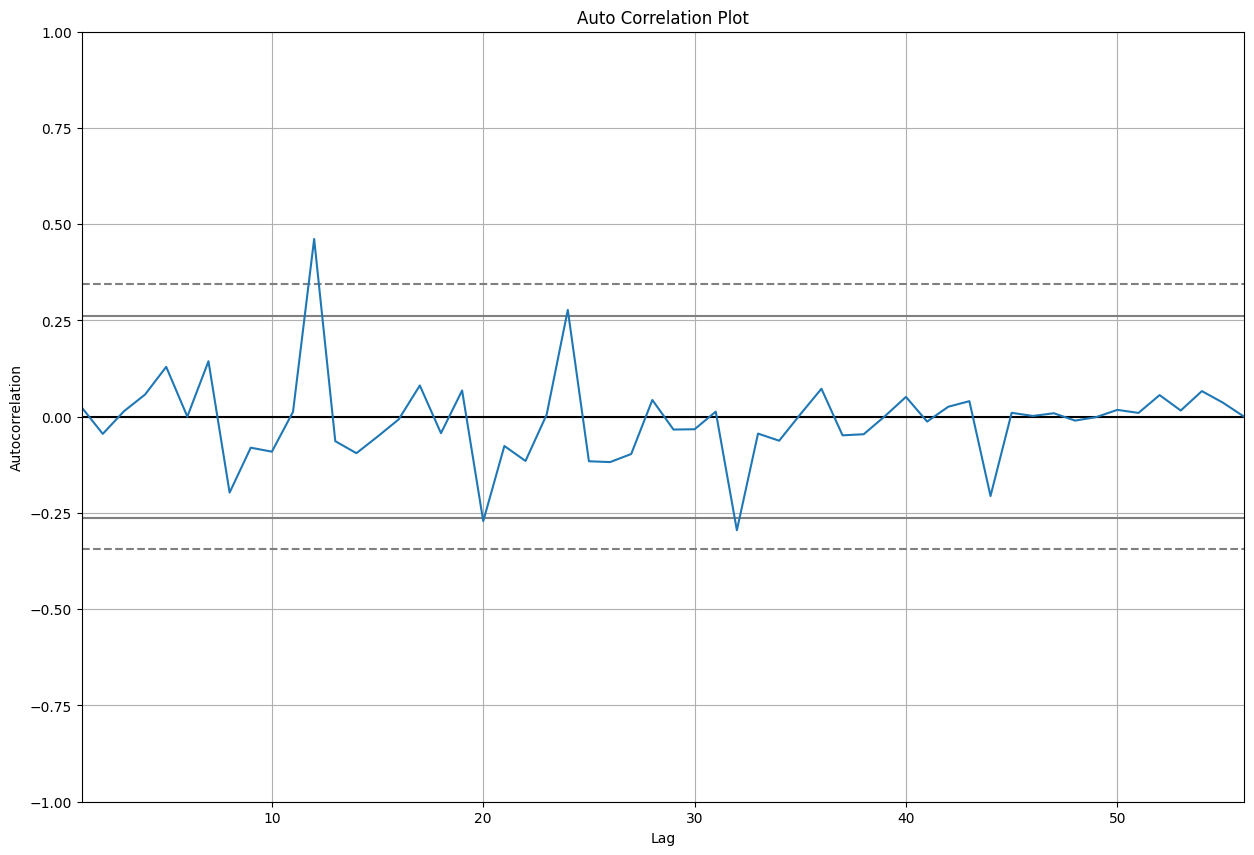

In [ ]:
# Auto Correlation Plot
plt.figure(figsize=(15, 10))
autocorrelation_plot(df['sales'])
plt.title('Auto Correlation Plot')
plt.show()

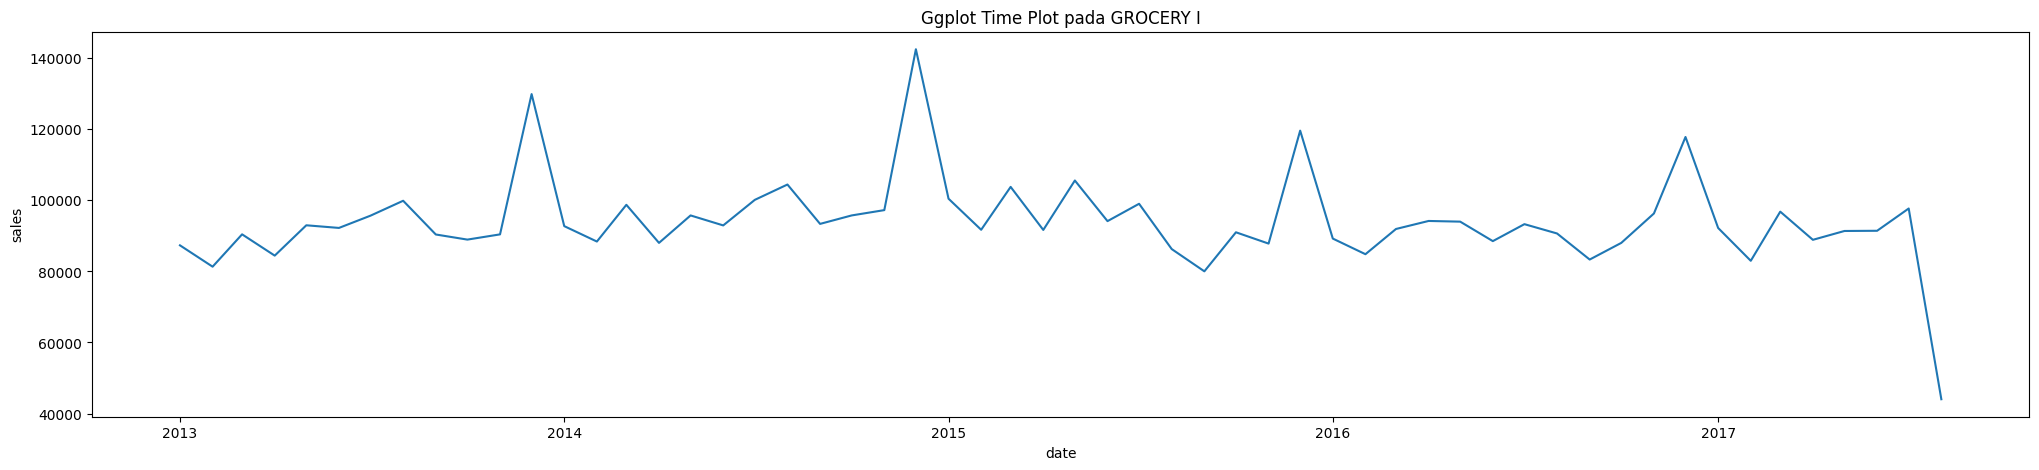

In [ ]:
# Ggplot Time Plot pada store_nbr 1
plt.figure(figsize=(25, 5))
sns.lineplot(x='date', y='sales', data=df)
plt.title('Ggplot Time Plot pada GROCERY I')
plt.show()

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# import matplotlib.pyplot as plt

# # Pastikan index adalah datetime
# df.index = pd.to_datetime(df.index)

# # (Opsional) Filter periode tertentu, misalnya 2016–2017
# df_filtered = df['2013-01-01':'2017-08-15'].copy()

# # Lakukan dekomposisi time series sales
# plt.rcParams['figure.figsize'] = (25, 15)
# decomposition = seasonal_decompose(df_filtered['sales'], model='additive', period=30)  # asumsi mingguan

# # Plot hasil dekomposisi
# fig = decomposition.plot()
# plt.show()


<Figure size 1500x500 with 0 Axes>

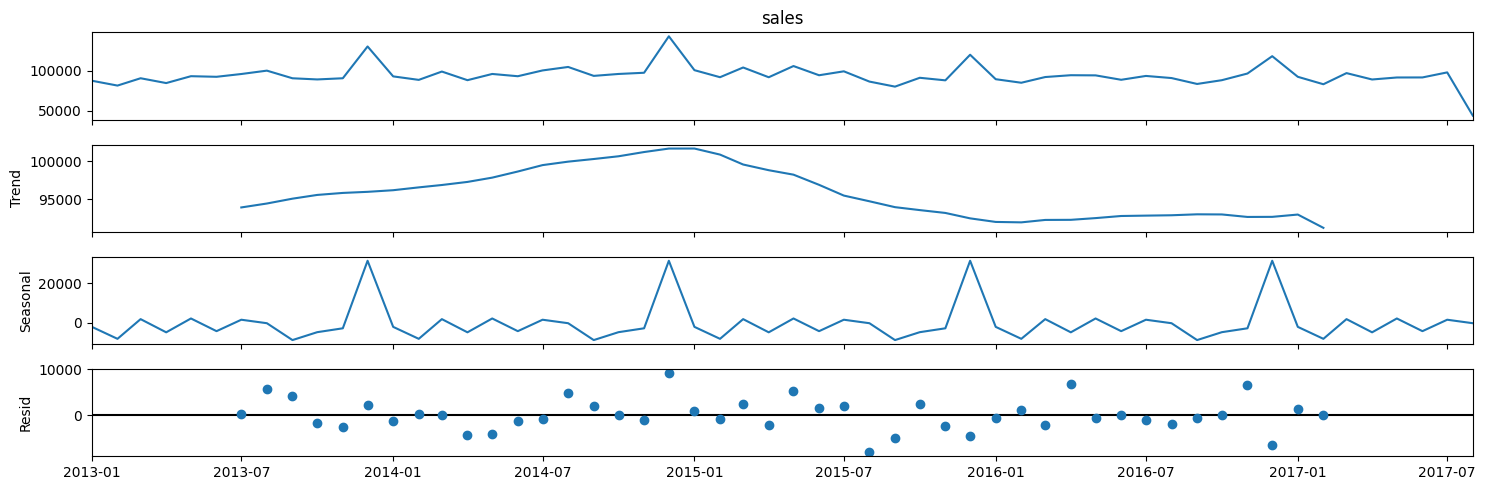

In [ ]:
# Decompose Time Series

# Make fig size bigger
plt.rcParams['figure.figsize'] = (15, 5)
decomposition = seasonal_decompose(df['sales'], model='add', period=12)
fig = plt.figure()
fig = decomposition.plot()

# Data Preprocessing

## Checking Missing Values

In [ ]:
df

,sales,onpromotion,dcoilwtico,year,month
date,,,,,
2013-01-01,87331.000,0,1989.89,2013,1
2013-02-01,81325.000,0,1810.87,2013,2
2013-03-01,90429.000,0,1858.77,2013,3
2013-04-01,84438.000,0,2024.47,2013,4
2013-05-01,92975.000,0,2079.21,2013,5
2013-06-01,92232.000,0,1915.45,2013,6
2013-07-01,95687.000,0,2302.76,2013,7
2013-08-01,99879.000,0,2344.60,2013,8
2013-09-01,90385.000,0,2125.79,2013,9


In [ ]:
# Jumlah missing value tiap kolom
missing_values = df.isnull().sum()

# Persentase missing value
missing_percent = (df.isnull().mean() * 100).round(2)

# Gabungkan menjadi satu tabel
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

# Tampilkan hasil
print("Cek Missing Value:")
print(missing_df)


Cek Missing Value:
             Missing Values  Percentage (%)
sales                     0             0.0
onpromotion               0             0.0
dcoilwtico                0             0.0
year                      0             0.0
month                     0             0.0


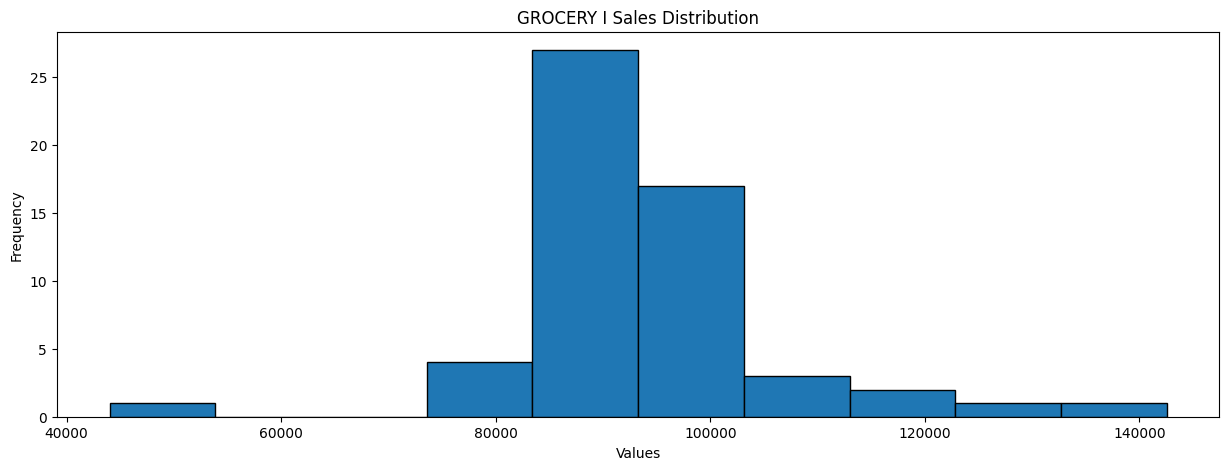

In [ ]:
plt.hist(df['sales'], bins=10, edgecolor='black')
plt.title("GROCERY I Sales Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

Index(['date', 'sales', 'onpromotion', 'dcoilwtico', 'year', 'month'], dtype='object')


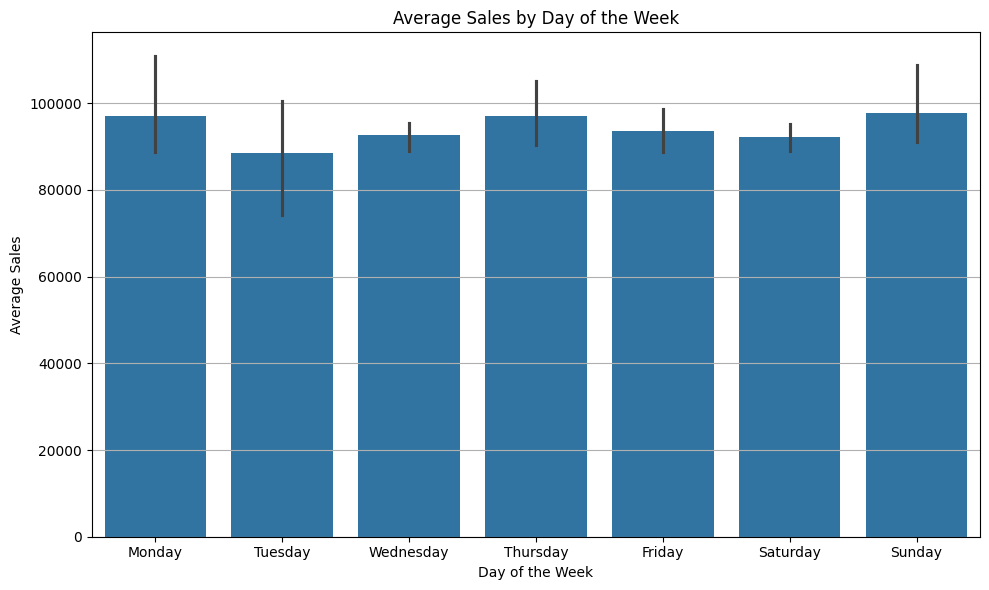

In [ ]:
df = df.reset_index()
print(df.columns)
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='sales', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

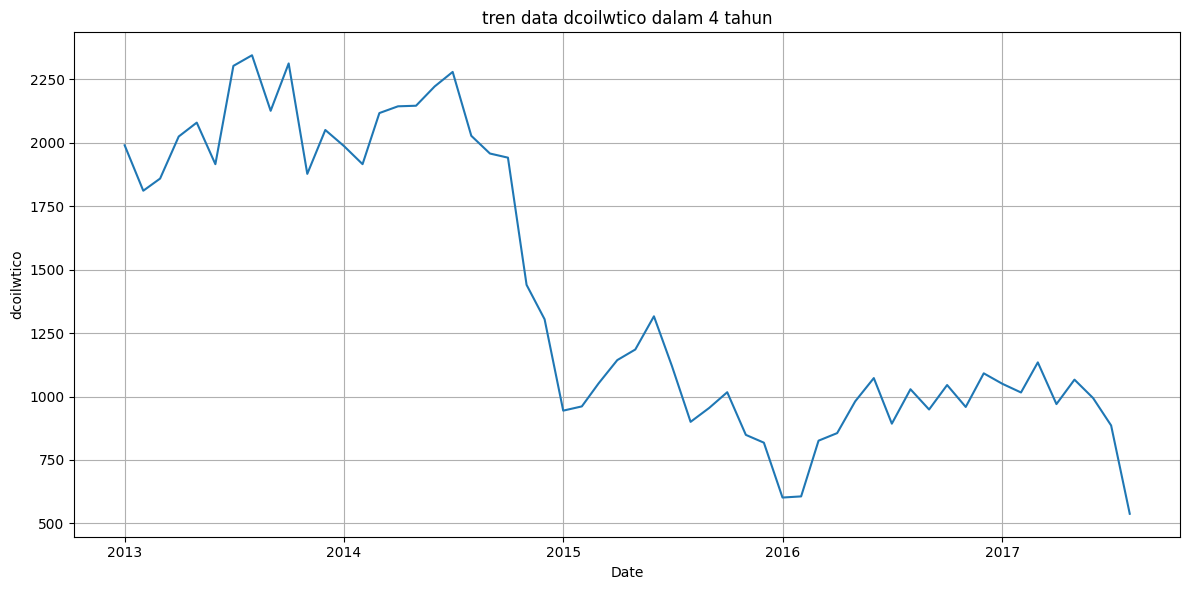

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='dcoilwtico')
plt.title('tren data dcoilwtico dalam 4 tahun')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.grid(True)
plt.tight_layout()
plt.show()

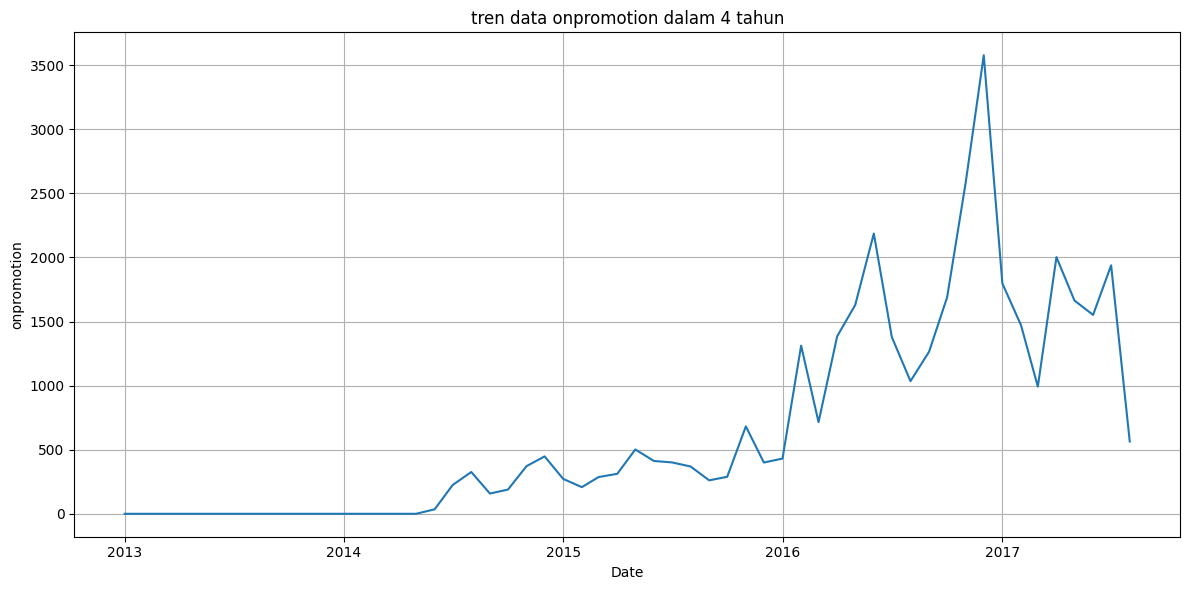

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='onpromotion')
plt.title('tren data onpromotion dalam 4 tahun')
plt.xlabel('Date')
plt.ylabel('onpromotion')
plt.grid(True)
plt.tight_layout()
plt.show()

## Handling Missing Values

In [ ]:
# df['dcoilwtico'] = df['dcoilwtico'].interpolate(method='linear')
# # Jumlah missing value tiap kolom
# missing_values = df.isnull().sum()

# # Persentase missing value
# missing_percent = (df.isnull().mean() * 100).round(2)

# # Gabungkan menjadi satu tabel
# missing_df = pd.DataFrame({
#     'Missing Values': missing_values,
#     'Percentage (%)': missing_percent
# })

# # Tampilkan hasil
# print("Cek Missing Value:")
# print(missing_df)


## Feature Engineering / New Features

In [ ]:
# Buat fitur lag
df['lag_1'] = df['sales'].shift(1)
df['lag_3'] = df['sales'].shift(3)
df['lag_6'] = df['sales'].shift(6)
df['lag_12'] = df['sales'].shift(12)


# Buat fitur rolling mean
df['rolling_3'] = df['sales'].rolling(window=3).mean()
df['rolling_6'] = df['sales'].rolling(window=6).mean()

# Hapus baris awal yang jadi NaN akibat lag/rolling
# df.dropna(inplace=True)

# Cek hasil
df


,date,sales,onpromotion,dcoilwtico,year,month,day_of_week,lag_1,lag_3,lag_6,lag_12,rolling_3,rolling_6
0,2013-01-01,87331.000,0,1989.89,2013,1,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-02-01,81325.000,0,1810.87,2013,2,Friday,87331.000,NaN,NaN,NaN,NaN,NaN
2,2013-03-01,90429.000,0,1858.77,2013,3,Friday,81325.000,NaN,NaN,NaN,86361.666667,NaN
3,2013-04-01,84438.000,0,2024.47,2013,4,Monday,90429.000,87331.000,NaN,NaN,85397.333333,NaN
4,2013-05-01,92975.000,0,2079.21,2013,5,Wednesday,84438.000,81325.000,NaN,NaN,89280.666667,NaN
5,2013-06-01,92232.000,0,1915.45,2013,6,Saturday,92975.000,90429.000,NaN,NaN,89881.666667,88121.666667
6,2013-07-01,95687.000,0,2302.76,2013,7,Monday,92232.000,84438.000,87331.000,NaN,93631.333333,89514.333333
7,2013-08-01,99879.000,0,2344.60,2013,8,Thursday,95687.000,92975.000,81325.000,NaN,95932.666667,92606.666667
8,2013-09-01,90385.000,0,2125.79,2013,9,Sunday,99879.000,92232.000,90429.000,NaN,95317.000000,92599.333333
9,2013-10-01,88947.000,0,2312.38,2013,10,Tuesday,90385.000,95687.000,84438.000,NaN,93070.333333,93350.833333


## Stationarity Data

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Uji ADF pada kolom sales
result = adfuller(df['sales'])  # dropna agar tidak error

# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')


ADF Statistic: 0.35917646510612483
p-value: 0.979902395110082
Critical Value 1%: -3.5885733964124715
Critical Value 5%: -2.929885661157025
Critical Value 10%: -2.6031845661157025


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Uji ADF pada kolom sales
result = adfuller(df['sales'].diff().dropna())  # dropna agar tidak error

# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')


ADF Statistic: -5.03887426975006
p-value: 1.8579796202293877e-05
Critical Value 1%: -3.5885733964124715
Critical Value 5%: -2.929885661157025
Critical Value 10%: -2.6031845661157025


## Correlation

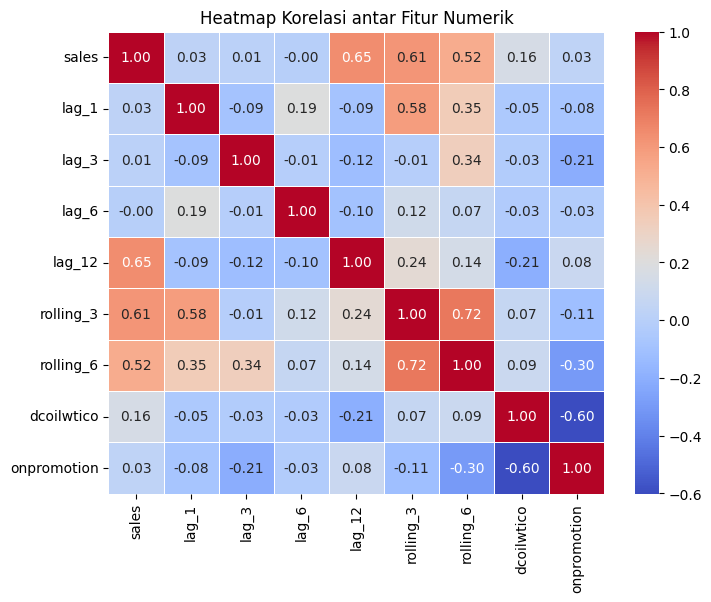

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik yang relevan
num_cols = ['sales', 'lag_1', 'lag_3','lag_6','lag_12', 'rolling_3','rolling_6', 'dcoilwtico', 'onpromotion']

# Hitung matriks korelasi
corr_matrix = df[num_cols].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.show()


## Feature Selection

In [ ]:
# Ambil hanya kolom numerik
df_num = df.select_dtypes(include='number')

# Hitung korelasi terhadap sales
correlations = df_num.corr()['sales'].sort_values(ascending=False)

# Tampilkan hasil korelasi
print("Korelasi terhadap 'sales':")
print(correlations)

# Ambil fitur dengan korelasi signifikan (misalnya > 0.5)
selected_features = correlations[abs(correlations) > 0.5].index.drop('sales').tolist()

print("\nFitur terpilih berdasarkan korelasi:")
print(selected_features)


Korelasi terhadap 'sales':
sales          1.000000
lag_12         0.649309
rolling_3      0.613004
rolling_6      0.521443
month          0.321104
dcoilwtico     0.155269
onpromotion    0.032139
lag_1          0.027952
lag_3          0.014178
lag_6         -0.004607
year          -0.209653
Name: sales, dtype: float64

Fitur terpilih berdasarkan korelasi:
['lag_12', 'rolling_3', 'rolling_6']


# Train Test Split

In [ ]:
# Tentukan proporsi split
train_size = int(len(df) * 0.8)

X = df.drop('sales', axis=1)
y = df['sales']

# Bagi data berdasarkan urutan waktu (bukan acak)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Cek hasil
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test :", X_test.shape[0])


Jumlah data train: 44
Jumlah data test : 12


# Modelling

## ARIMA

In [ ]:
# Sales Data Only

### ACF and PACF Plot

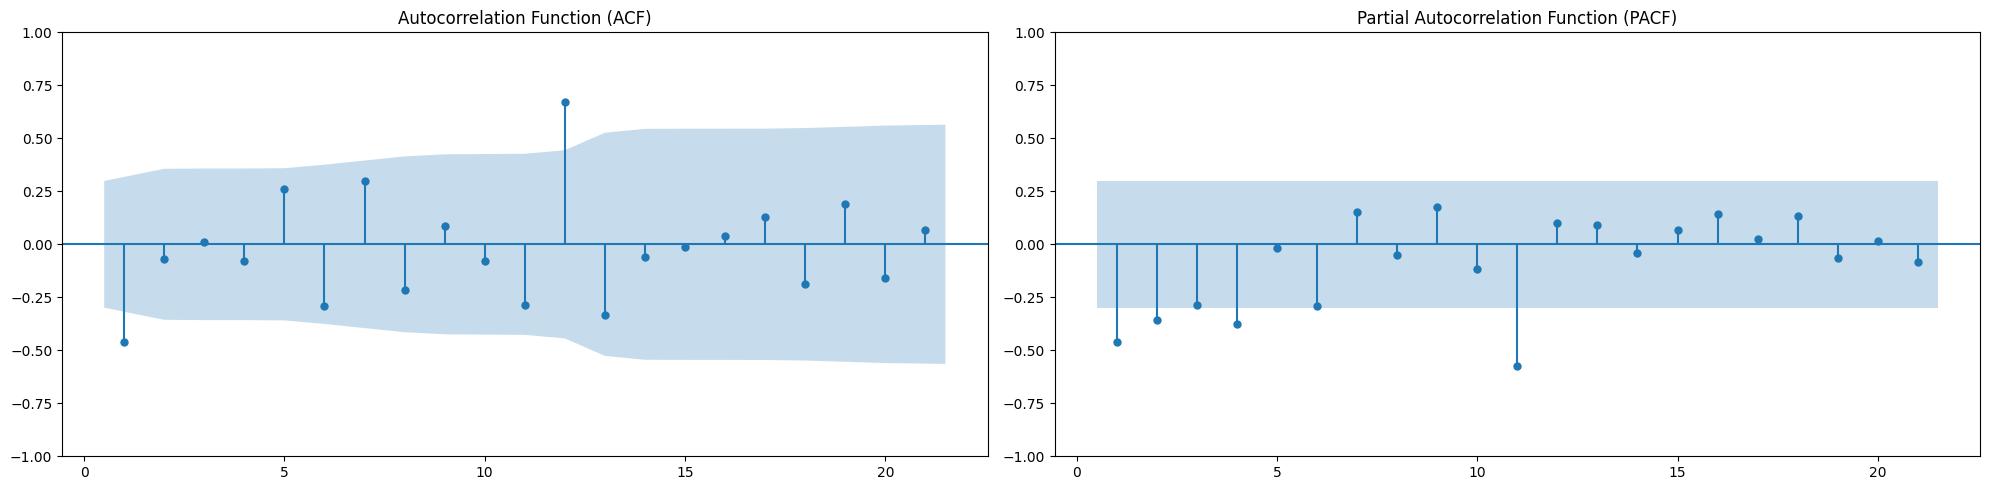

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Buat subplot sejajar
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# ACF plot
plot_acf(y_train.diff().dropna(), ax=axes[0], lags=21, zero=False)
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(y_train.diff().dropna(), ax=axes[1], lags=21, zero=False, method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


### Define Order (p, d, q)

In [ ]:
# SARIMA(1, 1, 1-2)( 1, 1, 1, 12)
# SARIMA(1-3, 0, 1-7)(1 - 4 , 0 , 1-4,7)
# SARIMA(5-7, 0, 1-7)(1 - 4 , 0 , 1-4,7)
# SARIMA(1, 0, 1)(1 , 0 , 1 , 7)

### Auto Arima

In [ ]:
# !pip install numpy==1.23.5
# !pip install pmdarima --no-cache-dir
# from pmdarima import auto_arima


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # Bangun model ARIMA(1,0,1)
# model = ARIMA(y_train, order=(1, 0, 1))
# model_fit = model.fit()

# # Tampilkan ringkasan model
# print(model_fit.summary())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train,
                order=(1,1,1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Ringkasan hasil
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -173.933
Date:                            Fri, 30 May 2025   AIC                            357.867
Time:                                    16:01:25   BIC                            362.033
Sample:                                         0   HQIC                           358.281
                                             - 44                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3083      0.590     -0.523      0.601      -1.464       0.848
ma.L1         -0.0894      0.534   

In [ ]:
# !pip install pmdarima

### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# 1. Prediksi ke periode test
start = len(y_train)
end = start + len(y_test) - 1
forecast = model_fit.predict(start=start, end=end)

# 2. Hitung metrik evaluasi
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)

# 3. Hitung MAPE (hindari pembagian nol)
mask = y_test.values.flatten() != 0
mape = mean_absolute_percentage_error(y_test.values[mask], forecast.values[mask]) * 100

# 4. Cetak hasil
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")



MAE  : 6572.65
MSE  : 168983297.20
RMSE : 12999.36
MAPE : 11.19%


### Forecasting (Optional)

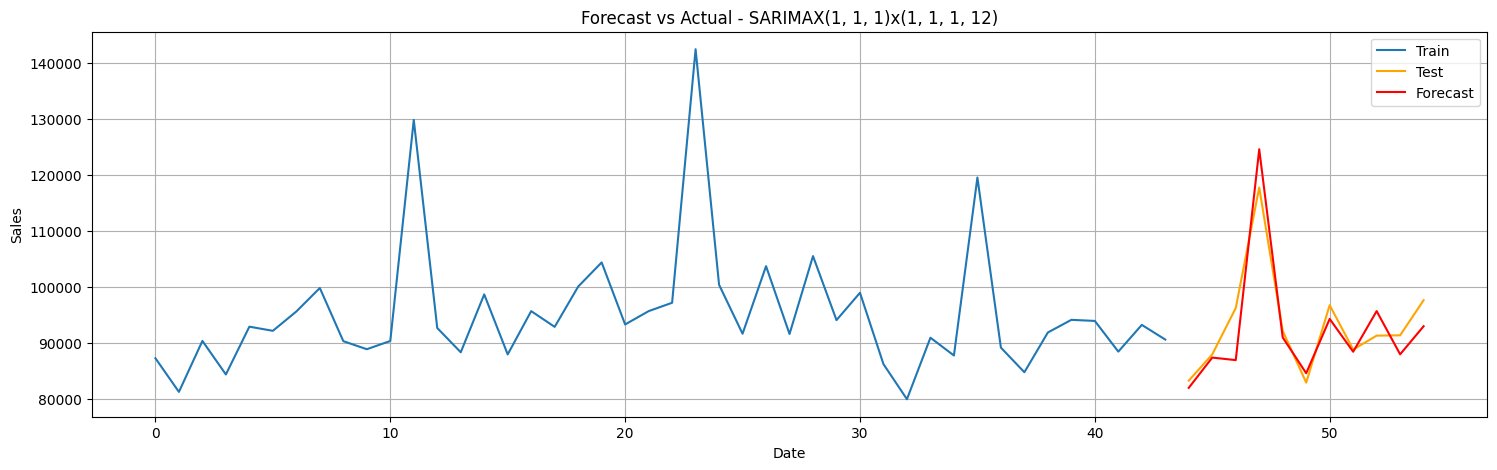

In [ ]:
# 3. Visualisasi Train, Test, Forecast
plt.figure(figsize=(18, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index[:-1], y_test.iloc[:-1], label='Test', color='orange')
plt.plot(y_test.index[:-1], forecast.iloc[:-1], label='Forecast', color='red')
plt.title('Forecast vs Actual - SARIMAX(1, 1, 1)x(1, 1, 1, 12)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()




# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(15,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Forecast vs Actual - ARIMA(1,0,1)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## LSTM

### LSTM Training

In [ ]:
# Sales Data Only ~ Features

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ambil hanya kolom sales (dan pastikan series)
sales_series = df['sales'].values.reshape(-1, 1)

# Normalisasi
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_series)

# Fungsi untuk membuat window data (lag time)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Window size (misal 14 hari sebelumnya)
window_size = 14
X, y = create_sequences(sales_scaled, window_size)

# Train-test split (80-20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split-1], X[split:-1]
y_train, y_test = y[:split-1], y[split:-1]

# Reshape X for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Bangun arsitektur LSTM
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16, activation='tanh', return_sequences=True))
model.add(Dense(1))  # output 1 nilai sales

# Compile model
model.compile(optimizer='adam', loss='mse')

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2818 - val_loss: 0.2537
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.2630 - val_loss: 0.2361
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.2437 - val_loss: 0.2187
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2259 - val_loss: 0.2014
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2070 - val_loss: 0.1841
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1902 - val_loss: 0.1668
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1721 - val_loss: 0.1496
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1532 - val_loss: 0.1330
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1359 - val_loss: 0.1176
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1226 - val_loss: 0.1043
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1079 - val_loss: 0.0946
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0992 - val_loss: 0.0898
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
MAE  : 6536.95
MSE  : 114279190.76
RMSE : 10690.14
MAPE : 6.30%


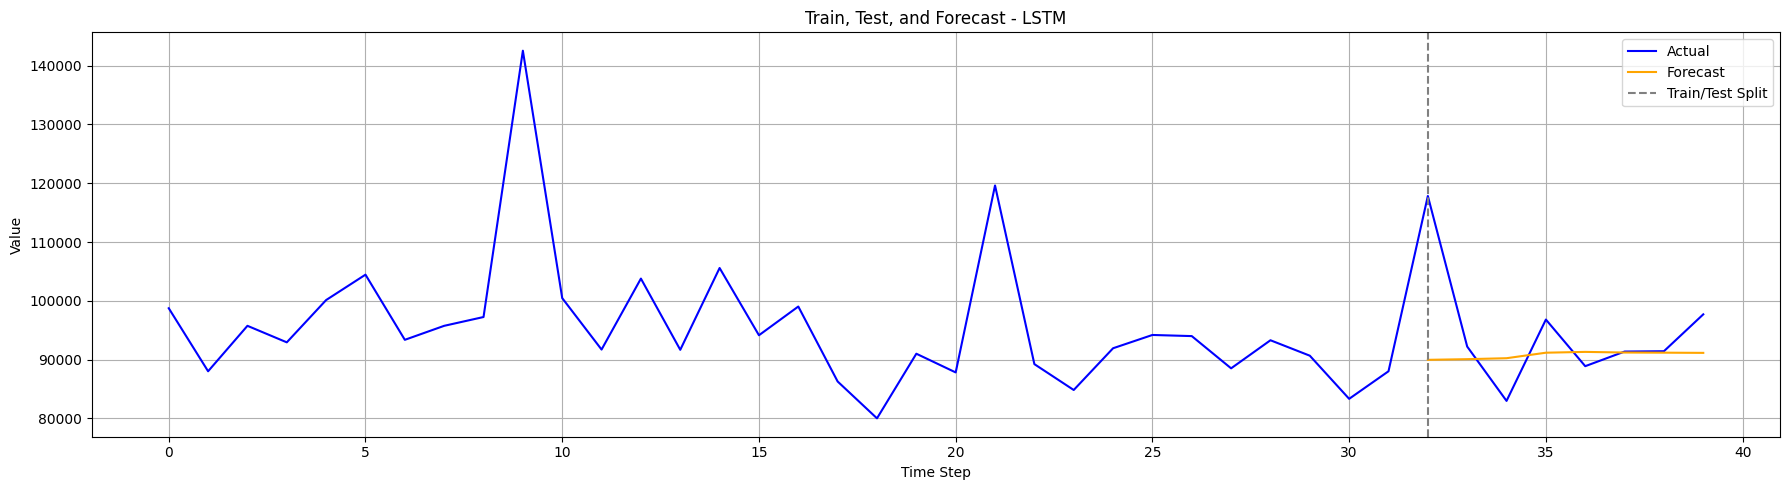

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Lakukan prediksi
y_pred_scaled = model.predict(X_test)

# Jika output dari model berbentuk 3D (misalnya LSTM), ambil hanya timestep terakhir
if y_pred_scaled.ndim == 3:
    y_pred_scaled = y_pred_scaled[:, -1, :]  # Atau ganti dengan [:, 0, :] jika perlu

# Pastikan semua data berbentuk 2D
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)
y_train_2d = y_train.reshape(-1, 1)

# Inversi normalisasi ke bentuk asli
y_pred_inv = scaler.inverse_transform(y_pred_scaled_2d)
y_test_inv = scaler.inverse_transform(y_test_2d)
y_train_inv = scaler.inverse_transform(y_train_2d)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

# Buat mask untuk hindari pembagian dengan nol
mask = y_test_inv.flatten() != 0
mape = mean_absolute_percentage_error(y_test_inv[mask], y_pred_inv[mask]) * 100

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# Gabungkan semua data aktual (train + test) dan ubah ke 1D
actual_full = np.concatenate((y_train_inv, y_test_inv)).ravel()

# Siapkan array kosong untuk forecast, dengan NaN pada bagian train
forecast_full = np.empty_like(actual_full)
forecast_full[:] = np.nan
forecast_full[len(y_train_inv):] = y_pred_inv.ravel()

# Plot hasil
plt.figure(figsize=(18, 5))
plt.plot(actual_full, label='Actual', color='blue')
plt.plot(forecast_full, label='Forecast', color='orange')
plt.axvline(x=len(y_train_inv), color='gray', linestyle='--', label='Train/Test Split')
plt.title('Train, Test, and Forecast - LSTM')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

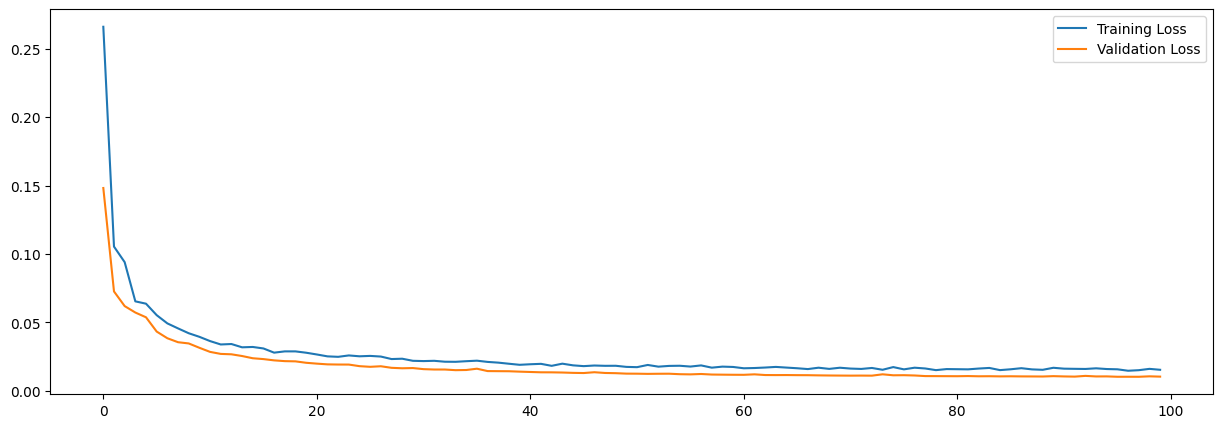

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
#PAKAI EPOCH 50, BATCH SIZE 32

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Bangun arsitektur LSTM
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))  # output 1 nilai sales

# Compile model
model.compile(optimizer='adam', loss='mse')

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2500 - val_loss: 0.2178
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2234 - val_loss: 0.1931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1988 - val_loss: 0.1698
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.1729 - val_loss: 0.1478
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.1503 - val_loss: 0.1272
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 0.1297 - val_loss: 0.1084
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 0.1106 - val_loss: 0.0919
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 0.0952 - val_loss: 0.0787
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0827 - val_loss: 0.0699
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0760 - val_loss: 0.0662
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0747 - val_loss: 0.0668
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0802 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
MAE  : 6817.30
MSE  : 124769448.10
RMSE : 11170.02
MAPE : 6.63%


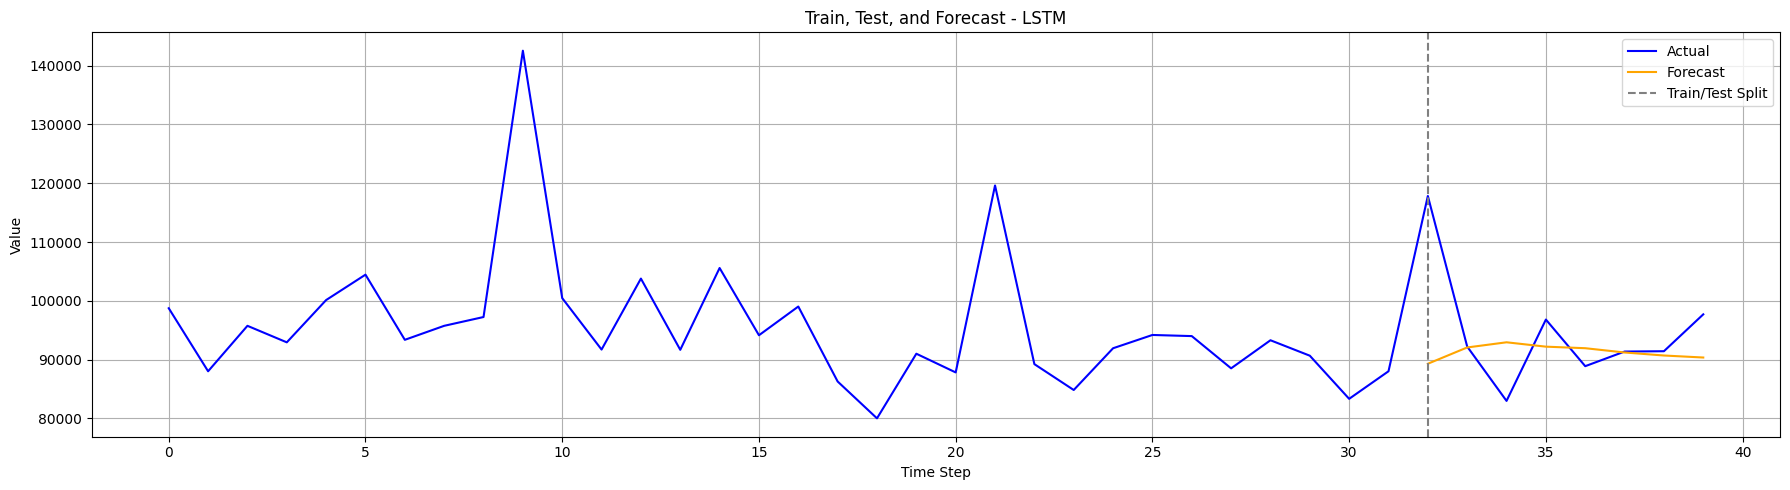

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Lakukan prediksi
y_pred_scaled = model.predict(X_test)

# Jika output dari model berbentuk 3D (misalnya LSTM), ambil hanya timestep terakhir
if y_pred_scaled.ndim == 3:
    y_pred_scaled = y_pred_scaled[:, -1, :]  # Atau ganti dengan [:, 0, :] jika perlu

# Pastikan semua data berbentuk 2D
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)
y_train_2d = y_train.reshape(-1, 1)

# Inversi normalisasi ke bentuk asli
y_pred_inv = scaler.inverse_transform(y_pred_scaled_2d)
y_test_inv = scaler.inverse_transform(y_test_2d)
y_train_inv = scaler.inverse_transform(y_train_2d)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

# Buat mask untuk hindari pembagian dengan nol
mask = y_test_inv.flatten() != 0
mape = mean_absolute_percentage_error(y_test_inv[mask], y_pred_inv[mask]) * 100

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# Gabungkan semua data aktual (train + test) dan ubah ke 1D
actual_full = np.concatenate((y_train_inv, y_test_inv)).ravel()

# Siapkan array kosong untuk forecast, dengan NaN pada bagian train
forecast_full = np.empty_like(actual_full)
forecast_full[:] = np.nan
forecast_full[len(y_train_inv):] = y_pred_inv.ravel()

# Plot hasil
plt.figure(figsize=(18, 5))
plt.plot(actual_full, label='Actual', color='blue')
plt.plot(forecast_full, label='Forecast', color='orange')
plt.axvline(x=len(y_train_inv), color='gray', linestyle='--', label='Train/Test Split')
plt.title('Train, Test, and Forecast - LSTM')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

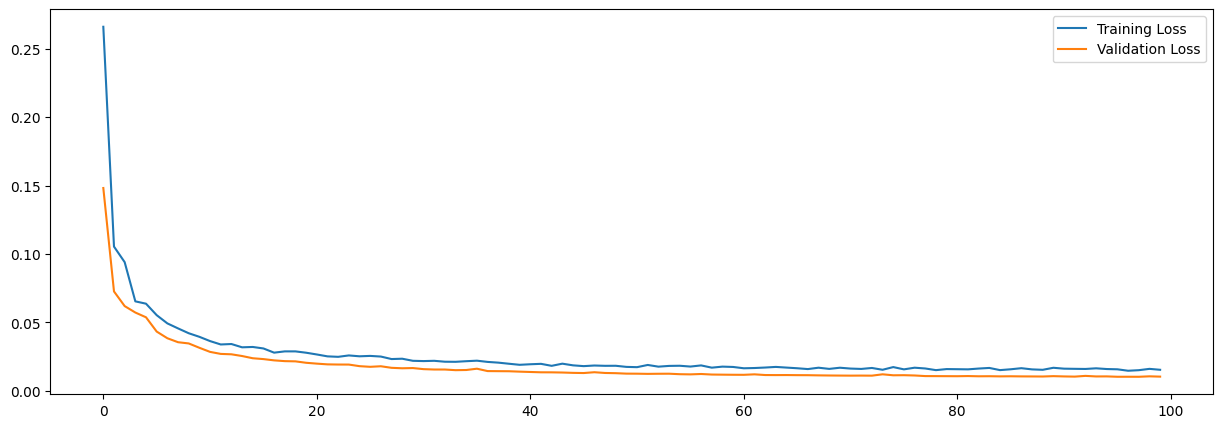

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
#PAKAI EPOCH 50, BATCH SIZE 5

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Bangun arsitektur LSTM
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))  # output 1 nilai sales

# Compile model
model.compile(optimizer='adam', loss='mse')

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=5,
                    validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.2586 - val_loss: 0.1327
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0933 - val_loss: 0.0714
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0786 - val_loss: 0.0579
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0670 - val_loss: 0.0536
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0593 - val_loss: 0.0489
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0589 - val_loss: 0.0407
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0639 - val_loss: 0.0370
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0388 - val_loss: 0.0367
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0333 - val_loss: 0.0338
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0389 - val_loss: 0.0303
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0366 - val_loss: 0.0285
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0313 - val_loss: 0.0274
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
MAE  : 7372.83
MSE  : 106066943.01
RMSE : 10298.88
MAPE : 7.51%


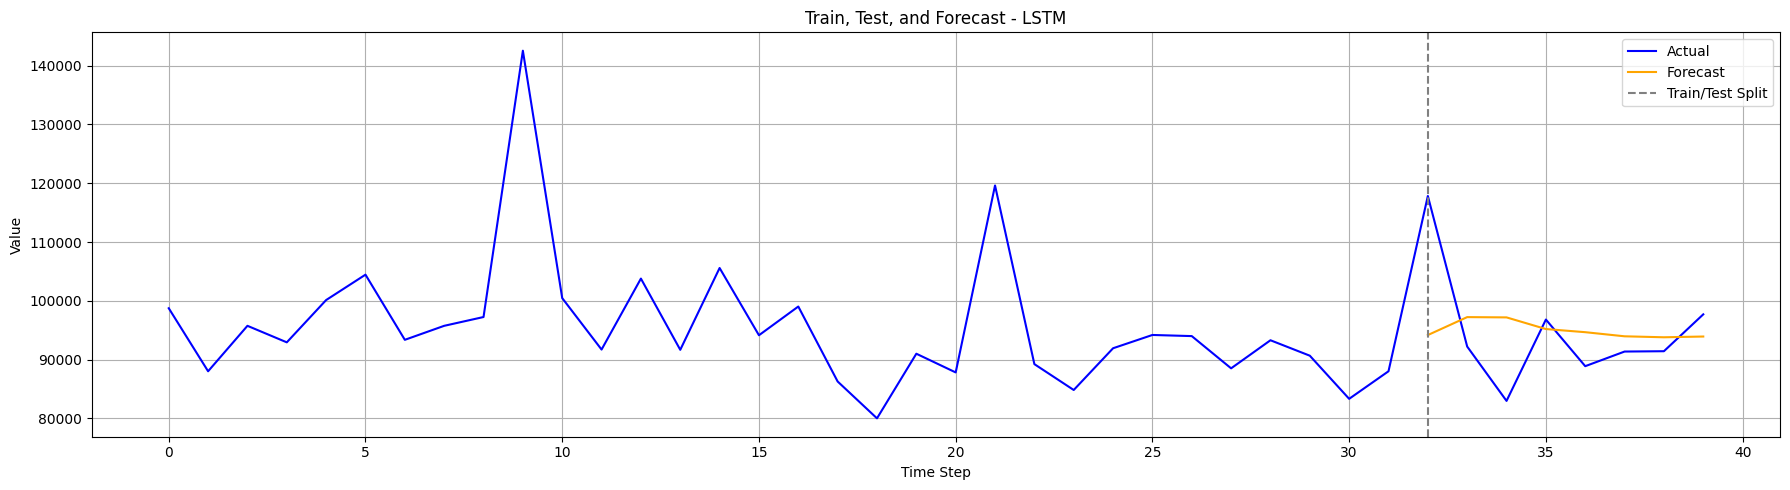

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Lakukan prediksi
y_pred_scaled = model.predict(X_test)

# Jika output dari model berbentuk 3D (misalnya LSTM), ambil hanya timestep terakhir
if y_pred_scaled.ndim == 3:
    y_pred_scaled = y_pred_scaled[:, -1, :]  # Atau ganti dengan [:, 0, :] jika perlu

# Pastikan semua data berbentuk 2D
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)
y_train_2d = y_train.reshape(-1, 1)

# Inversi normalisasi ke bentuk asli
y_pred_inv = scaler.inverse_transform(y_pred_scaled_2d)
y_test_inv = scaler.inverse_transform(y_test_2d)
y_train_inv = scaler.inverse_transform(y_train_2d)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

# Buat mask untuk hindari pembagian dengan nol
mask = y_test_inv.flatten() != 0
mape = mean_absolute_percentage_error(y_test_inv[mask], y_pred_inv[mask]) * 100

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# Gabungkan semua data aktual (train + test) dan ubah ke 1D
actual_full = np.concatenate((y_train_inv, y_test_inv)).ravel()

# Siapkan array kosong untuk forecast, dengan NaN pada bagian train
forecast_full = np.empty_like(actual_full)
forecast_full[:] = np.nan
forecast_full[len(y_train_inv):] = y_pred_inv.ravel()

# Plot hasil
plt.figure(figsize=(18, 5))
plt.plot(actual_full, label='Actual', color='blue')
plt.plot(forecast_full, label='Forecast', color='orange')
plt.axvline(x=len(y_train_inv), color='gray', linestyle='--', label='Train/Test Split')
plt.title('Train, Test, and Forecast - LSTM')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Evaluation

### Forecasting (Optional)

# Comparison Model

In [ ]:
# # Model LSTM dengan arsitektur yang disesuaikan dan Early Stopping
# # Import EarlyStopping if not already imported
# from tensorflow.keras.callbacks import EarlyStopping
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler

# # Ensure the scaler is defined and fitted before this cell if it's not global
# # For example, if the previous scaling step was in a separate cell:
# # sales_series = df['sales'].values.reshape(-1, 1)
# # scaler = MinMaxScaler()
# # sales_scaled = scaler.fit_transform(sales_series)
# # window_size = 14
# # X, y = create_sequences(sales_scaled, window_size)
# # split = int(len(X) * 0.8)
# # X_train, X_test = X[:split], X[split:]
# # y_train, y_test = y[:split], y[split:]
# # X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# # X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# # Bangun model LSTM dengan Dropout dan arsitektur yang lebih kompleks
# model = Sequential()
# # Adjust input_shape if window_size is different from 30
# model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1))) # Lebih banyak unit, return_sequences untuk layer selanjutnya
# model.add(Dropout(0.3)) # Dropout untuk mencegah overfitting
# model.add(LSTM(100, activation='tanh')) # Layer LSTM kedua
# model.add(Dropout(0.3)) # Dropout kedua
# model.add(Dense(1)) # Output layer
# model.compile(optimizer='adam', loss='mse') # Menggunakan Adam optimizer dan Mean Squared Error loss

# # Implementasi Early Stopping
# # Menghentikan pelatihan jika loss tidak membaik selama 'patience' epochs
# early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)

# # Melatih model dengan Early Stopping
# # Menggunakan validation_split untuk memantau performa pada sebagian data training
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping], validation_split=0.2)

# # Plot training and validation loss
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# if 'val_loss' in history.history:
#     plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss During Training')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()


# # ====== Make Predictions ======
# y_pred = model.predict(X_test)

# # ====== Pastikan y_pred dan y_test berbentuk 2D array ======
# if len(y_pred.shape) == 1:
#     y_pred = y_pred.reshape(-1, 1)
# if len(y_test.shape) == 1:
#     y_test = y_test.reshape(-1, 1)

# # ====== Inverse Transform (Kembali ke skala asli) ======
# # Pastikan 'scaler' adalah scaler yang dipakai saat scaling target (y)
# y_pred_inv = scaler.inverse_transform(y_pred)
# y_test_inv = scaler.inverse_transform(y_test)

# # ====== Assign Hasil Akhir ======
# y_true = y_test_inv
# y_pred_lstm = y_pred_inv

# # ====== Hitung Metrik Evaluasi ======
# mae = mean_absolute_error(y_true, y_pred_lstm)
# rmse = np.sqrt(mean_squared_error(y_true, y_pred_lstm))
# mape = mean_absolute_percentage_error(y_true, y_pred_lstm)*100

# # ====== Cetak Hasil ======
# print("Evaluasi Model LSTM Terbaik:")
# print(f"MAE  : {mae:.2f}")
# print(f"RMSE : {rmse:.2f}")
# print(f"MAPE : {mape:.2%}")

# # ====== Pastikan y_true dan y_pred_lstm berbentuk 2D array ======
# if len(y_true.shape) == 1:
#     y_true = y_true.reshape(-1, 1)
# if len(y_pred_lstm.shape) == 1:
#     y_pred_lstm = y_pred_lstm.reshape(-1, 1)

# # ====== Hitung Metrik Evaluasi dengan Masking Zero Values ======
# # Create a mask to exclude zero values from the actual test data
# mask = y_true != 0

# # Calculate MAPE only for non-zero actual values
# # Ensure both y_true and y_pred_lstm are flattened to 1D arrays before applying the mask
# mape_masked = mean_absolute_percentage_error(y_true[mask].flatten(), y_pred_lstm[mask].flatten()) * 100

# # ====== Cetak Hasil ======
# print("\nEvaluasi Model LSTM Terbaik (Masked MAPE):")
# print(f"MAPE (excluding zeros): {mape_masked:.2f}%")

# # Prediksi dan visualisasi
# y_pred = model.predict(X_test)
# y_pred_inv = scaler.inverse_transform(y_pred)
# y_test_inv = scaler.inverse_transform(y_test)

# plt.figure(figsize=(12, 4))
# plt.plot(y_test_inv, label='Actual')
# plt.plot(y_pred_inv, label='Predicted')
# plt.title("LSTM Best Model Prediction vs Actual Sales (GROCERY)")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()

# # Lakukan prediksi
# y_pred_scaled = model.predict(X_test)

# # Jika output dari model berbentuk 3D (misalnya LSTM), ambil hanya timestep terakhir
# if y_pred_scaled.ndim == 3:
#     y_pred_scaled = y_pred_scaled[:, -1, :]

# # Pastikan semua data berbentuk 2D
# y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
# y_test_2d = y_test.reshape(-1, 1)
# y_train_2d = y_train.reshape(-1, 1) # Ini mungkin tidak diperlukan untuk plot final, tapi bagus untuk konsistensi

# # Inversi normalisasi ke bentuk asli
# y_pred_inv = scaler.inverse_transform(y_pred_scaled_2d)
# y_test_inv = scaler.inverse_transform(y_test_2d)
# y_train_inv = scaler.inverse_transform(y_train_2d) # Ini mungkin tidak diperlukan untuk plot final

# # Hitung metrik evaluasi
# mae = mean_absolute_error(y_test_inv, y_pred_inv)
# mse = mean_squared_error(y_test_inv, y_pred_inv)
# rmse = np.sqrt(mse)
# mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

# print(f"MAE  : {mae:.2f}")
# print(f"MSE  : {mse:.2f}")
# print(f"RMSE : {rmse:.2f}")
# print(f"MAPE : {mape:.2f}%")

# # Gabungkan semua data aktual (train + test) dan ubah ke 1D
# # Perhatikan index data aktual. Kita perlu menggunakan index date dari df
# # dan membaginya sesuai split data
# # Use df which contains the data for 'GROCERY I'
# actual_full_series = df.iloc[:len(y_train_inv) + len(y_test_inv)]

# # Siapkan array kosong untuk forecast, dengan NaN pada bagian train
# forecast_values = np.empty_like(actual_full_series['sales'].values)
# forecast_values[:] = np.nan
# # Offset indeks untuk menempatkan hasil forecast di bagian test
# forecast_start_index = len(y_train_inv)
# forecast_values[forecast_start_index:] = y_pred_inv.ravel()

# # Buat series pandas untuk forecast dengan index yang sama dengan actual_full_series
# forecast_full_series = pd.Series(forecast_values, index=actual_full_series.index)

# # Plot hasil
# plt.figure(figsize=(18, 5))
# plt.plot(actual_full_series.index, actual_full_series['sales'].values, label='Actual', color='blue')
# plt.plot(forecast_full_series.index, forecast_full_series.values, label='Forecast', color='orange')

# # Menambahkan garis pemisah dengan index tanggal yang sesuai
# # Kita perlu mencari tanggal di mana split terjadi
# # Asumsi bahwa urutan data dalam df sesuai dengan urutan data yang digunakan untuk training/testing
# split_date = df.index[len(y_train_inv) - 1] # Tanggal terakhir di data training
# plt.axvline(x=split_date, color='gray', linestyle='--', label='Train/Test Split')

# plt.title('Train, Test, and Forecast - LSTM (Best Model)')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# Forecasting The Best Model (Optional)